# Heart Disease Detection Model

**1. Imported Dataset and performed EDA**

In [1]:
import pandas as pd

In [63]:
df = pd.read_csv('E:\ML\health\heart_disease_data.csv')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [66]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
df.shape

(606, 14)

**2. Split the dataset into input and output/target columns**

In [72]:
# input columns: 
x = df.iloc[:, 0:13].values

# output columns:
y = df.iloc[:, 13]

**3. Preprocessing our input columns**

In [38]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc = StandardScaler()
x = sc.fit_transform(x)

**4. Split the data into train and test set**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

**5. Metrics to measure our model performance:**

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
print("Accuracy score: ", accuracy_score(y_test, dt.predict(x_test)))

Accuracy score:  0.9672131147540983


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

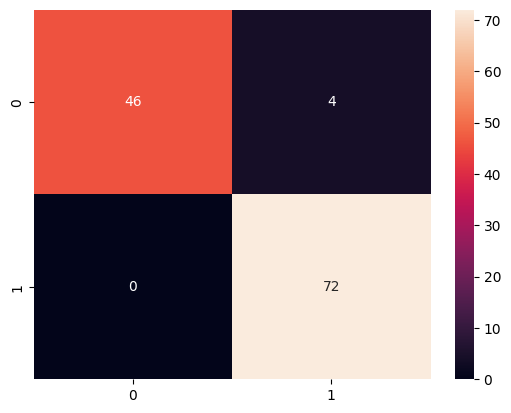

In [92]:
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)), annot=True)